In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
import warnings
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_pickle(r'D:\Py_Prjs\OPA_repo\ClusterAnalysis\KMeans\Data\df_allInfo_clean.pkl')
df_numeric = df.select_dtypes(include=['float64'])
cnt = df_numeric.isnull().sum()
X = df_numeric.fillna(df_numeric.median())
sc = MinMaxScaler()
X_scaled = pd.DataFrame(sc.fit_transform(X), columns=X.columns, index=X.index)

In [10]:
plt.figure(figsize=(50, 10), dpi=500)

Z = linkage(X_scaled, method = 'ward', metric = 'euclidean')

plt.title("HCA dendrogram")
dendrogram(Z, labels = X_scaled.index, leaf_rotation = 90., color_threshold = 1.5)
plt.show()

In [17]:
## Insert your code here
n_clusters = 502

s_scores = []
ca_scores = []

for n_clst in range(2, n_clusters + 1) :
    
    cluster = AgglomerativeClustering(n_clusters = n_clst)

    cluster.fit(X_scaled)

    labels = cluster.labels_

    s_score = silhouette_score(X_scaled, labels, metric='sqeuclidean')
    ca_score = calinski_harabasz_score(X_scaled, labels)
    s_scores.append(s_score)
    ca_scores.append(ca_score)


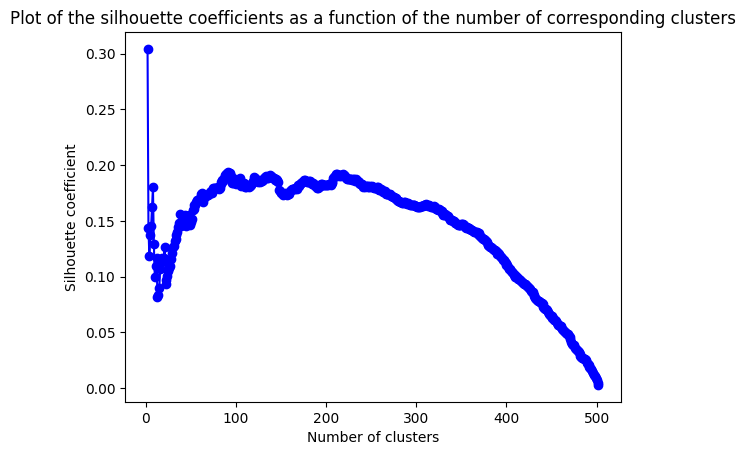

In [13]:
plt.plot(list(range(2, n_clusters + 1)), s_scores, 'bo-')
plt.title('Plot of the silhouette coefficients as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

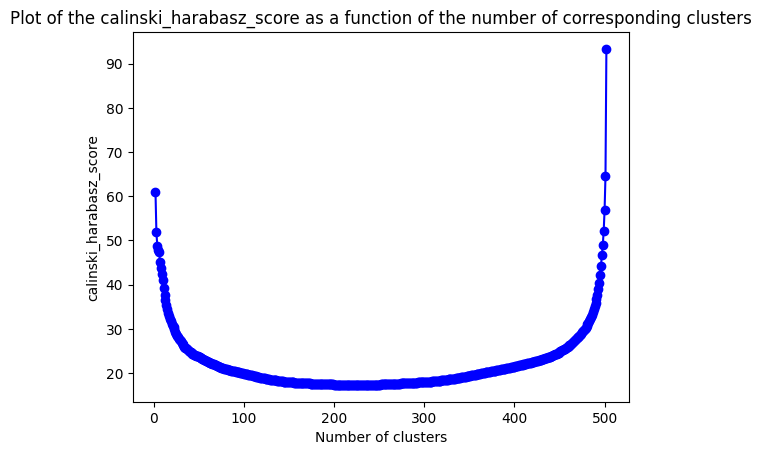

In [18]:
plt.plot(list(range(2, n_clusters + 1)), ca_scores, 'bo-')
plt.title('Plot of the calinski_harabasz_score as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

feature selection 

In [183]:
#https://jundongl.github.io/scikit-feature/tutorial.html
from skfeature.utility import construct_W
from skfeature.function.similarity_based import lap_score
kwargs_W = {"metric":"euclidean","neighbor_mode":"knn","weight_mode":"heat_kernel","k":5,'t':1}
W = construct_W.construct_W(X_scaled.to_numpy(), **kwargs_W)
score = lap_score.lap_score(X_scaled.to_numpy(), W=W)
idx = lap_score.feature_ranking(score)

# selected_features = X_scaled.to_numpy()[:, idx[0:num_fea]]

In [184]:
df_feature_imp = pd.merge(pd.Series(idx, name='rank'), pd.Series(X_scaled.columns, name='col'), right_index=True, left_index=True)\
                .sort_values('rank')

In [185]:
#df_feature_imp.set_index('col')
df_nc = pd.DataFrame(cnt, columns=["null count"], index=cnt.index)
df_feature_imp = df_feature_imp.set_index('col').join(df_nc)
df_feature_imp.head(47)

,rank,null count
col,,
profitMargins,0,0
operatingMargins,1,0
heldPercentInsiders,2,0
shortRatio,3,0
heldPercentInstitutions,4,0
payoutRatio,5,12
targetLowPrice,6,14
fiftyDayAverage,7,1
sharesShort,8,0


In [186]:

num_fea = 23
selected_features = list(X_scaled.columns[idx < num_fea])

In [187]:
## Insert your code here
n_clusters = 502

s_scores = []
ca_scores = []

for n_clst in range(2, n_clusters + 1) :
    
    cluster = AgglomerativeClustering(n_clusters = n_clst)

    cluster.fit(X_scaled[selected_features])

    labels = cluster.labels_

    s_score = silhouette_score(X_scaled[selected_features], labels, metric='sqeuclidean')
    ca_score = calinski_harabasz_score(X_scaled[selected_features], labels)
    s_scores.append(s_score)
    ca_scores.append(ca_score)


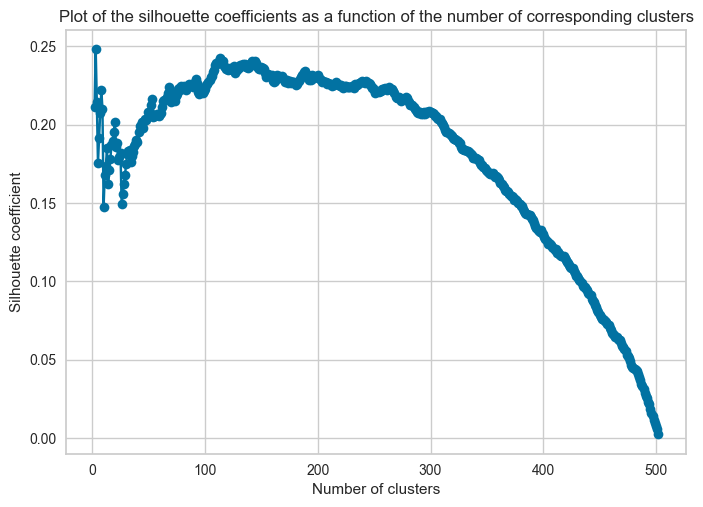

In [188]:
plt.plot(list(range(2, n_clusters + 1)), s_scores, 'bo-')
plt.title('Plot of the silhouette coefficients as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette coefficient')
plt.show()

In [189]:
from scipy.signal import argrelextrema
argrelextrema(np.array(s_scores), np.greater)

(array([  1,   6,  11,  18,  20,  23,  31,  37,  42,  45,  47,  51,  56,
         62,  66,  70,  75,  77,  79,  84,  86,  90,  95, 108, 111, 114,
        120, 124, 127, 129, 133, 140, 142, 148, 154, 157, 162, 164, 166,
        171, 173, 176, 187, 191, 193, 198, 203, 207, 209, 214, 216, 219,
        223, 225, 228, 231, 237, 241, 251, 255, 258, 261, 264, 270, 276,
        282, 289, 292, 295, 297, 327, 338, 341, 353, 356, 366, 373, 396,
        403, 409, 411, 415, 424], dtype=int64),)

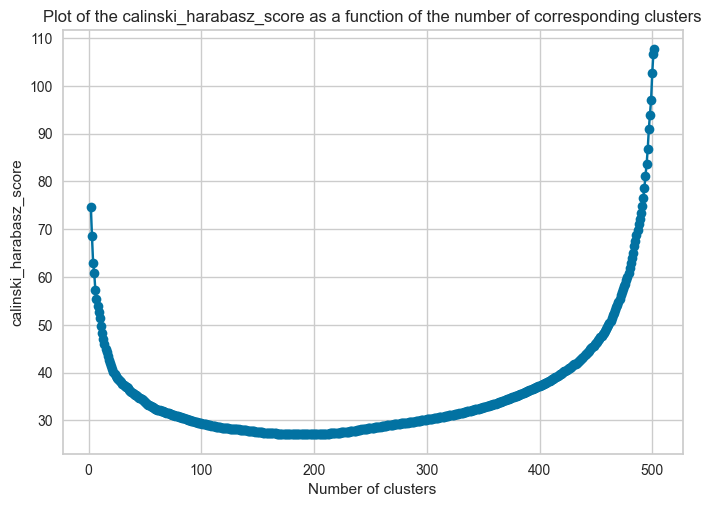

In [190]:
plt.plot(list(range(2, n_clusters + 1)), ca_scores, 'bo-')
plt.title('Plot of the calinski_harabasz_score as a function of the number of corresponding clusters')
plt.xlabel('Number of clusters')
plt.ylabel('calinski_harabasz_score')
plt.show()

Comparison of the selected features result against KMeans from the all features selection

In [191]:
# repeat elbow analysis, storing all results
## Insert your code here
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
import numpy as np
from matplotlib import pyplot as plt 
range_n_clusters = list(range(2, 11)) 
distortions = []
df_k_cluster = dict()

for n_clusters in range_n_clusters:
    cluster = KMeans(n_clusters = n_clusters, random_state=42)
    cluster.fit(X_scaled[selected_features])
    c = cluster.cluster_centers_
    l = cluster.labels_
    disto = sum(np.min(cdist(X_scaled[selected_features], c, 'euclidean'), axis=1)) / np.size(X_scaled[selected_features], axis = 0)
    distortions.append(disto)
    df_k_cluster[n_clusters] = [pd.merge(pd.Series(X.index), pd.Series(l, name='cluster'), right_index=True, left_index=True), disto]


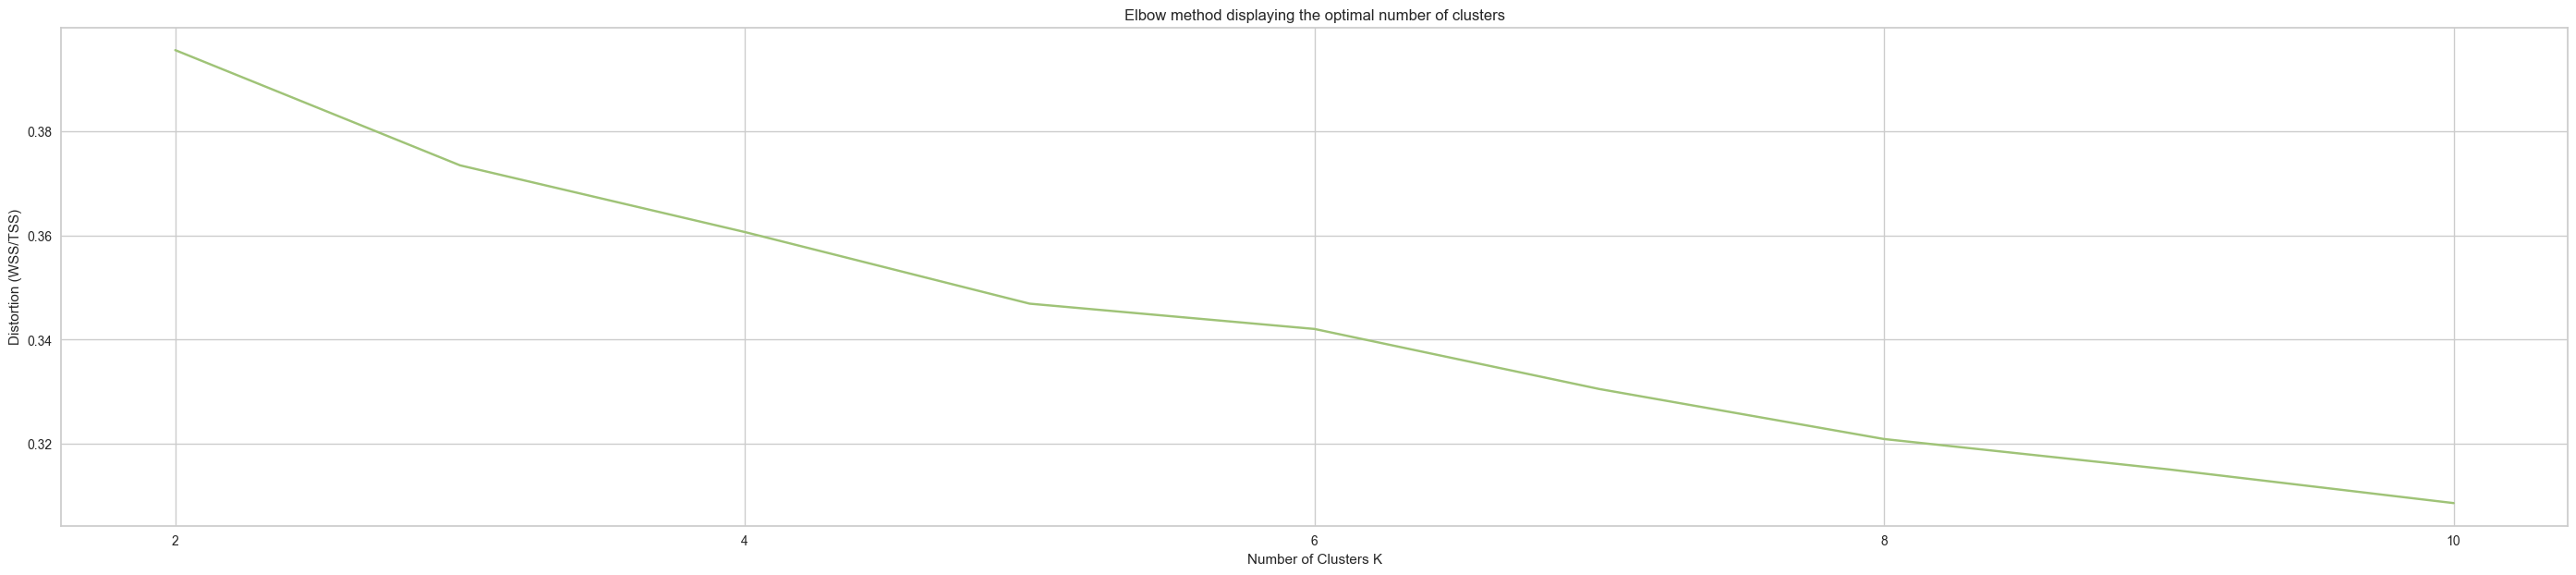

In [111]:

plt.figure(figsize=(35, 7))
plt.xticks(np.arange(2, 101, step=2))
plt.grid(visible=True)
plt.plot(range_n_clusters, distortions, 'gx-')
plt.xlabel('Number of Clusters K')
plt.ylabel('Distortion (WSS/TSS)')
plt.title('Elbow method displaying the optimal number of clusters')


plt.show()

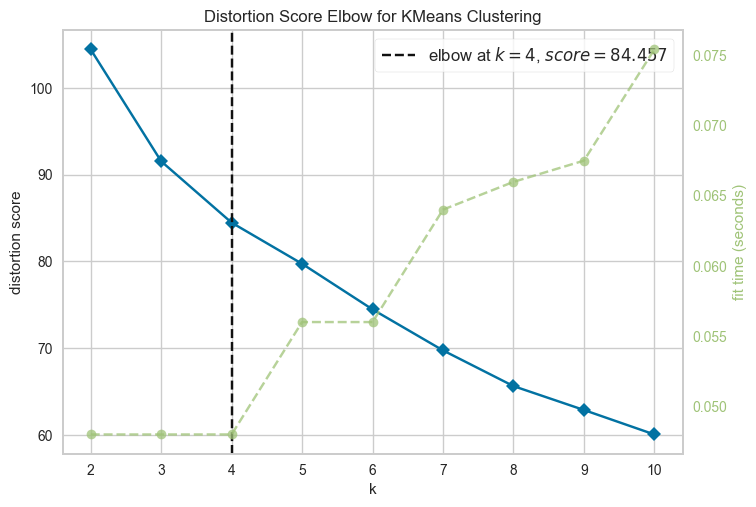

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [192]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
km = KMeans(random_state=42)
visualizer = KElbowVisualizer(km, k=(2,11))
visualizer.fit(X_scaled[selected_features])
visualizer.show()

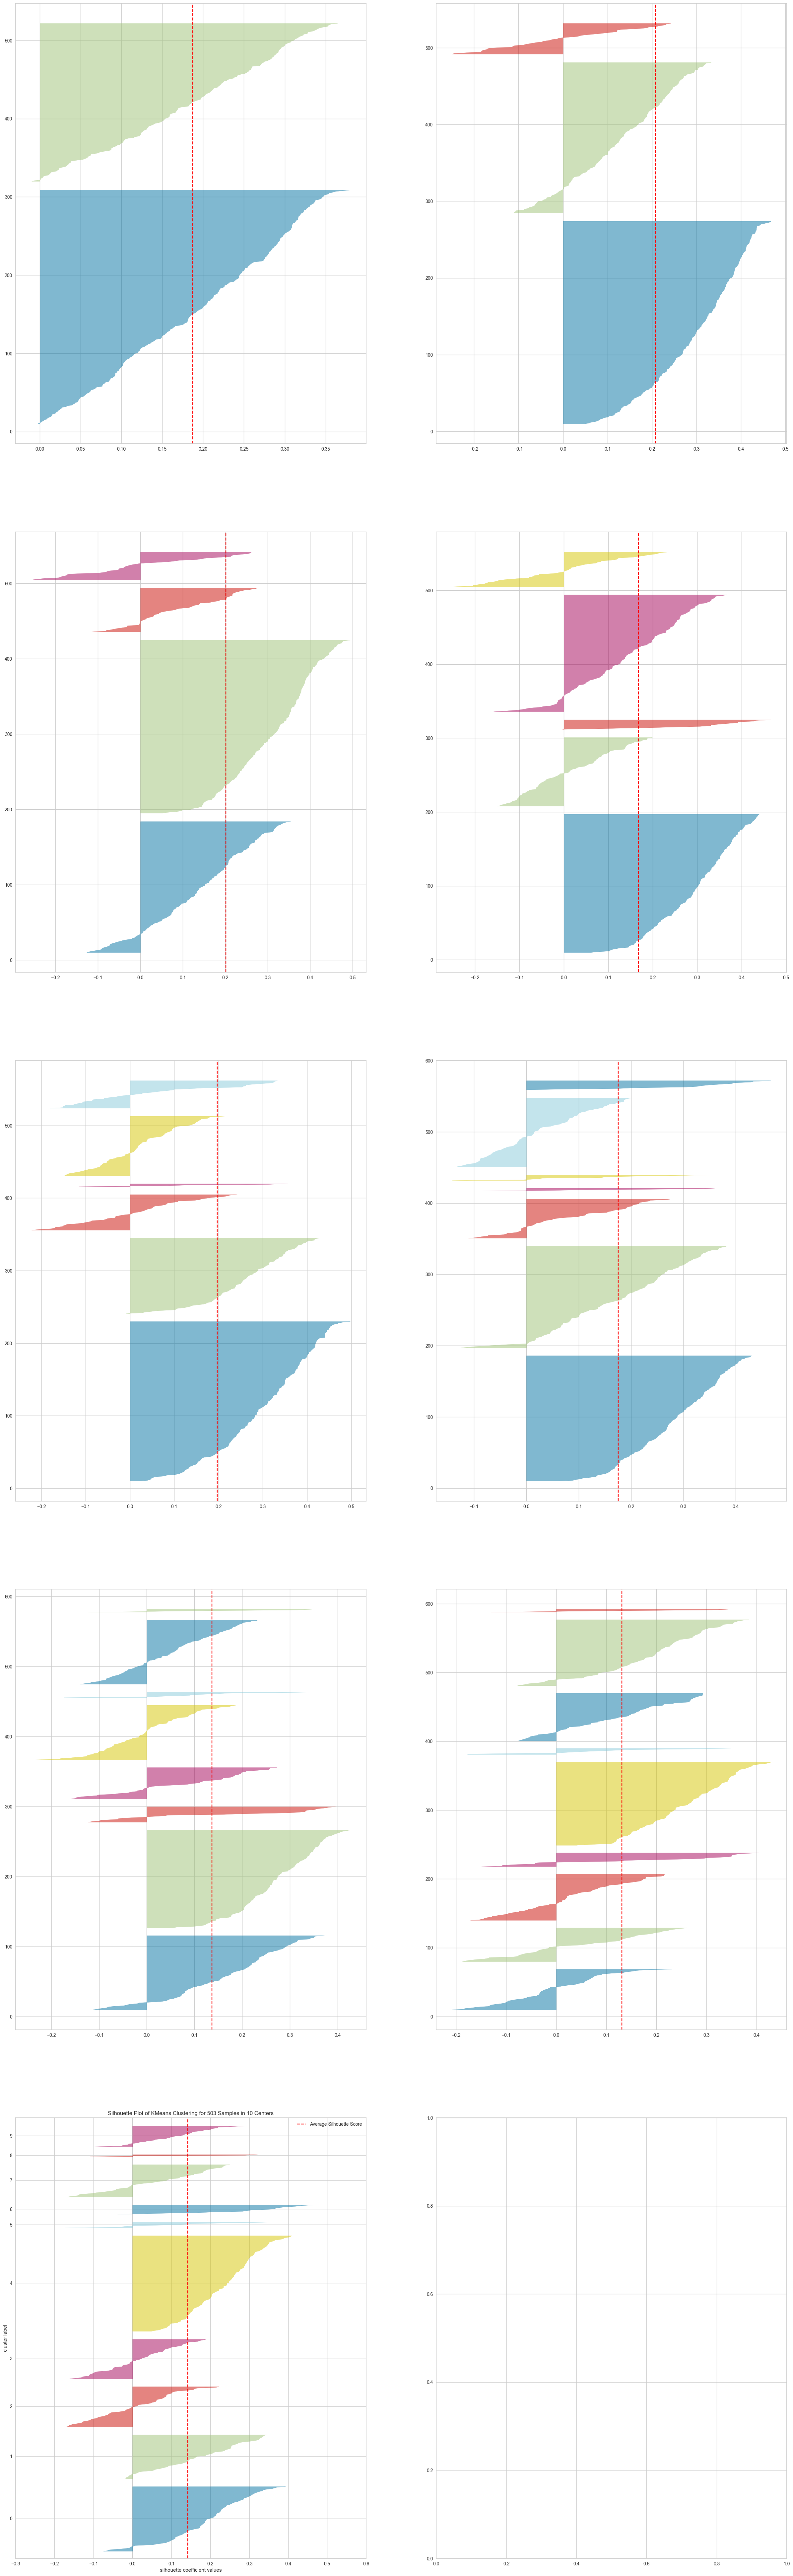

<AxesSubplot: title={'center': 'Silhouette Plot of KMeans Clustering for 503 Samples in 10 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [193]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(5, 2, figsize=(30,100))
for i in range(2, 11):
    km = KMeans(n_clusters=i, random_state=42)
    q, mod = divmod(i, 2)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(X_scaled[selected_features])
visualizer.show()

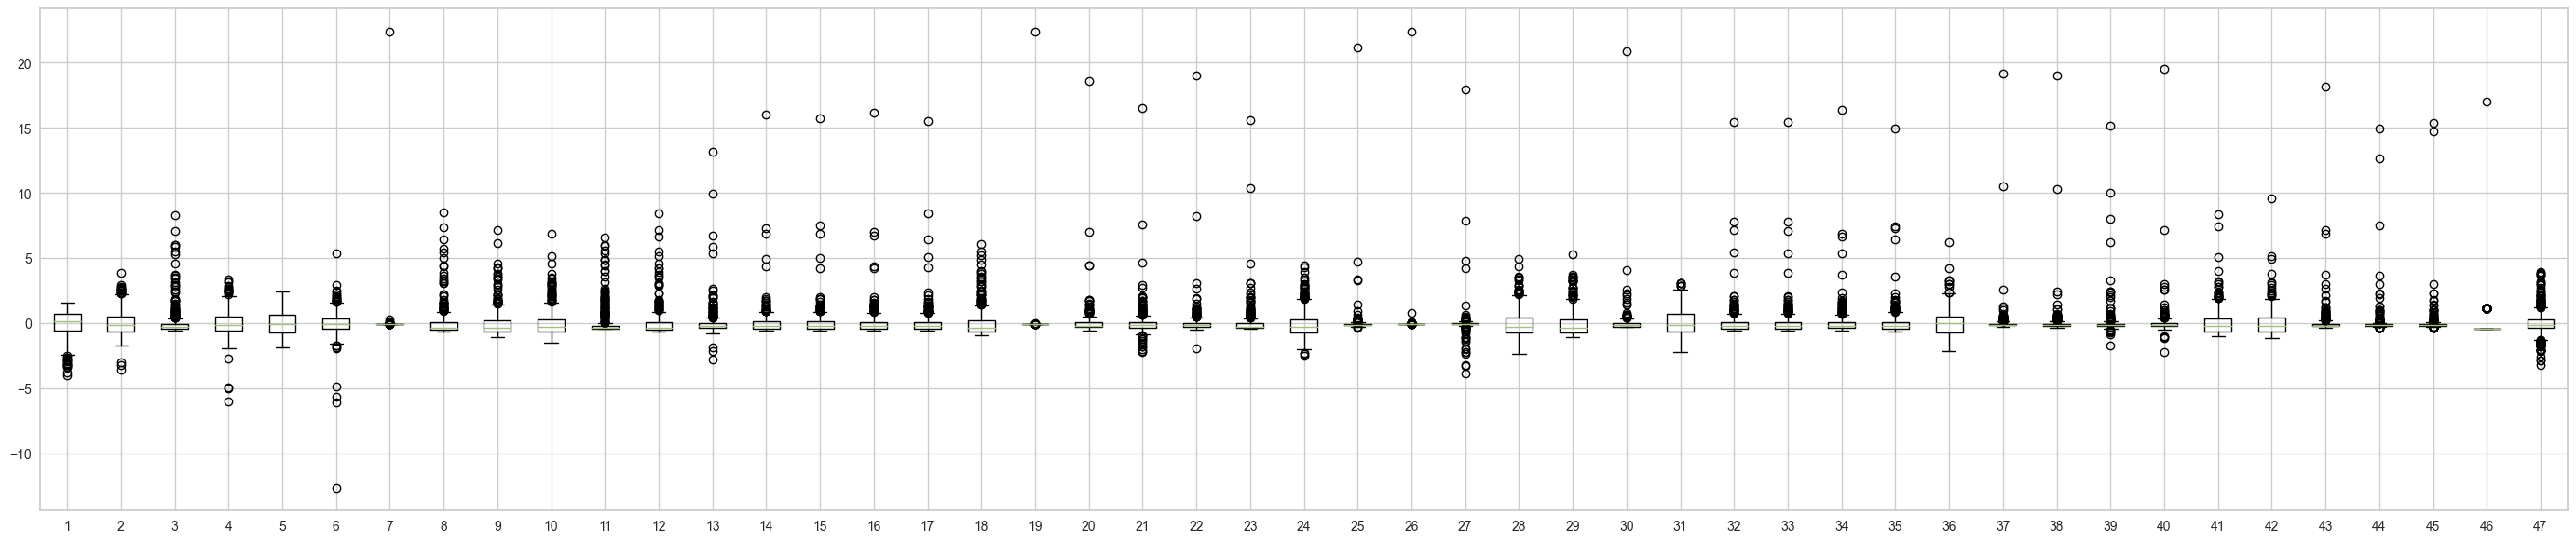

In [120]:
sc = StandardScaler()
X_scaled_sc = pd.DataFrame(sc.fit_transform(X), columns=X.columns, index=X.index)
plt.figure(figsize=(35, 7))
plt.boxplot(X_scaled_sc);

In [194]:
#WSS, BSS calculation

wss = dict()
bss = dict()
N_max = 30
for N in range(2, N_max + 1):
    kmeans = KMeans(n_clusters = N)
    kmeans.fit(X_scaled[selected_features])
    c = kmeans.cluster_centers_
    l = kmeans.labels_
    print(c)
    print(l)
    wss[N] = 0
    bss[N] = 0
    for i in range(N):
        wss[N] = wss[N] + ((cdist(X_scaled[selected_features][l == i], np.tile(c[i], (47, 1)), 'euclidean').min(axis=1))**2).sum()
        bss[N] = bss[N] + sum(l == i)*(cdist(np.tile(X_scaled[selected_features].mean(axis = 0), (47, 1)), np.tile(c[i], (47, 1)), 'euclidean').mean())

[[6.87061294e-01 5.90471920e-01 2.85447325e-01 6.83828362e-01
  3.78446045e-03 7.31278219e-02 1.84120671e-01 6.81160087e-02
  1.66027504e-01 2.59558888e-02 2.69229598e-02 1.42194476e-01
  4.04058676e-03 1.11860016e-01 8.89312462e-02 3.21585884e-02
  2.83572615e-01 1.45207963e-02 2.40594331e-02 2.89053973e-02
  2.52041424e-01 8.18274264e-03 1.04493340e-01]
 [7.44575501e-01 7.10073098e-01 6.54388663e-01 7.29330544e-01
  2.71146033e-04 6.06465352e-02 1.78227561e-01 4.46973922e-02
  1.81638468e-01 4.77347820e-02 4.91196522e-02 1.17312391e-01
  7.09222094e-04 1.23140321e-01 9.31380854e-02 1.24482348e-02
  3.82692664e-01 1.16801861e-02 4.49923201e-02 5.37917726e-02
  2.59761701e-01 2.04812780e-02 1.06574793e-01]]
[1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 1 1 1 0 1 1 0 1 0 0 1 1
 1 0 1 1 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 1 1
 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 0 1 0
 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0

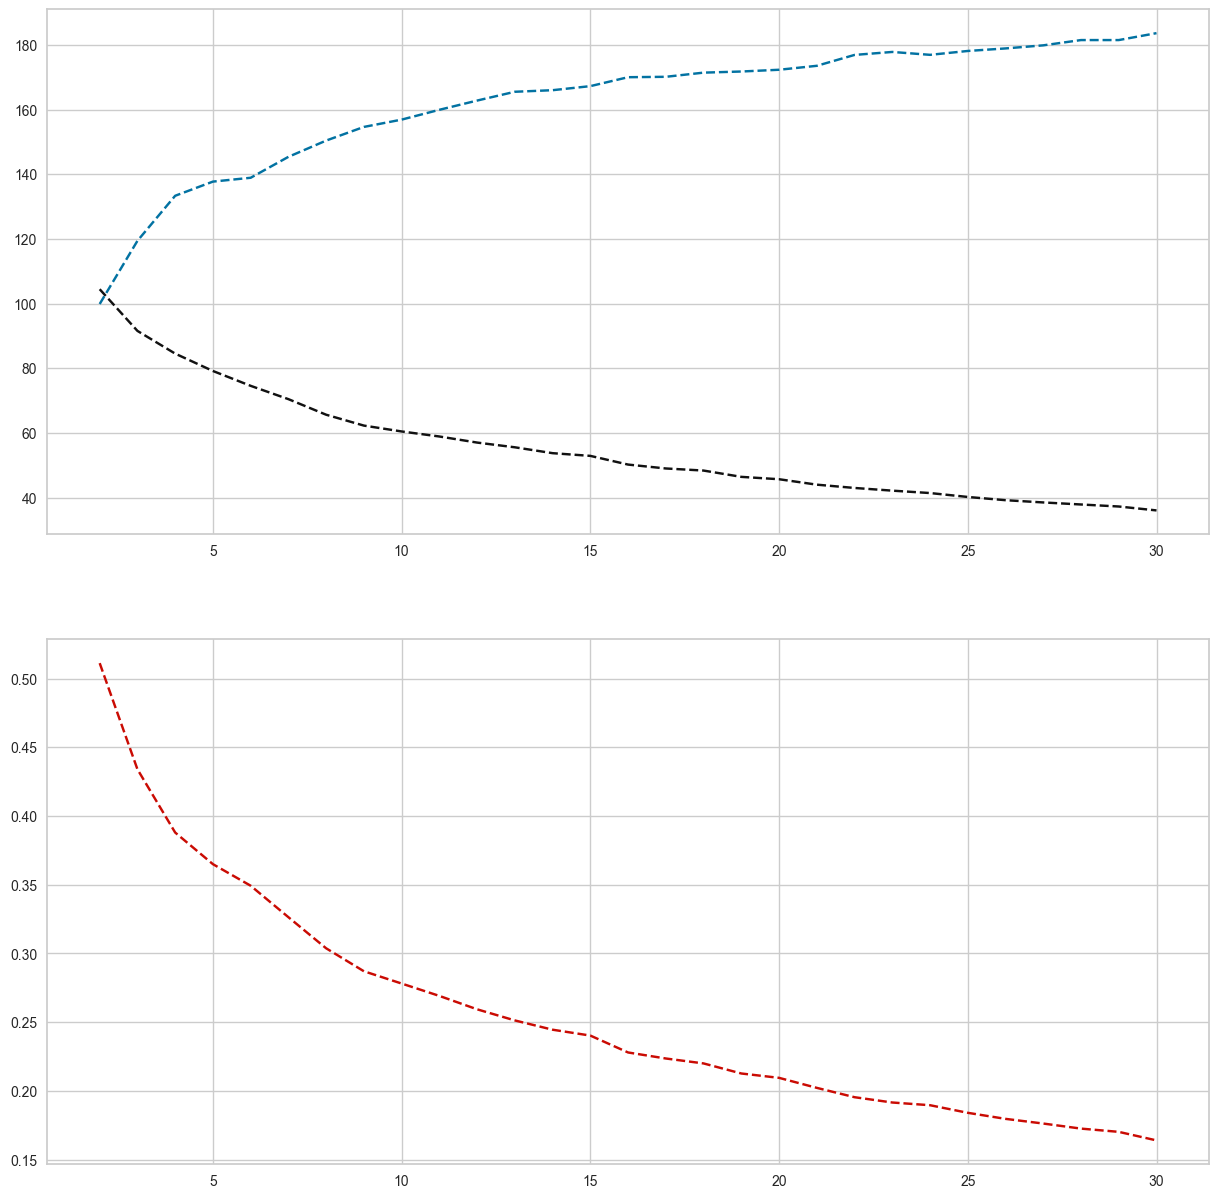

In [195]:
fig, ax = plt.subplots(2, 1, figsize=(15,15))
plt.subplot(2, 1, 1)
plt.plot(wss.keys(), wss.values(), 'k--')
plt.plot(bss.keys(), bss.values(), 'b--')
plt.subplot(2, 1, 2)
plt.plot(bss.keys(), 
        np.array(list(wss.values()))/(np.array(list(wss.values())) + np.array(list(bss.values()))), 'r--')